In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv('/naman/pgads/insurance.csv')

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [68]:
data.shape

(1338, 7)

In [69]:
# value counts for categorical data
print(data.sex.value_counts(),'\n',data.region.value_counts(),'\n',data.smoker.value_counts(),'\n',data.children.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


## Replacing the categorical variable with numeric variables

- converting this so that we could implement these value in y_hat formula
- converting string into 0's and 1's

In [70]:
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Exploratory Data Analysis

### Uni-Variate Analysis
- Whenever we analysis the single variable at a time is called Univariate

Text(0, 0.5, 'Frequency of each age group')

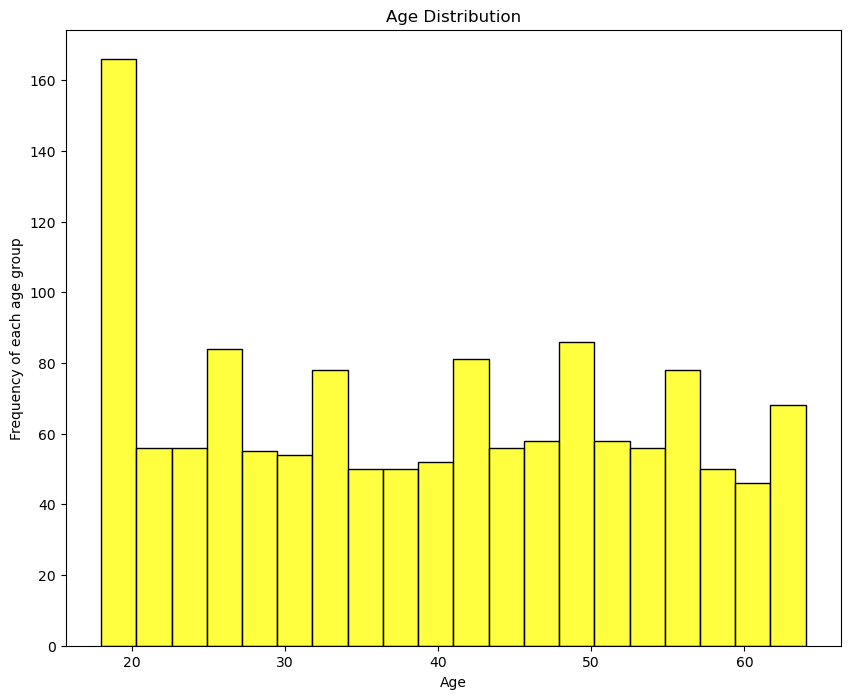

In [72]:
# checking Age distribution
plt.figure(figsize=(10,8))
sns.histplot(data.age, bins=20,kde=False, color='yellow')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each age group')

***Maximum people in a dataset have an age below 20***

Text(0.5, 1.0, 'Gender Distribution')

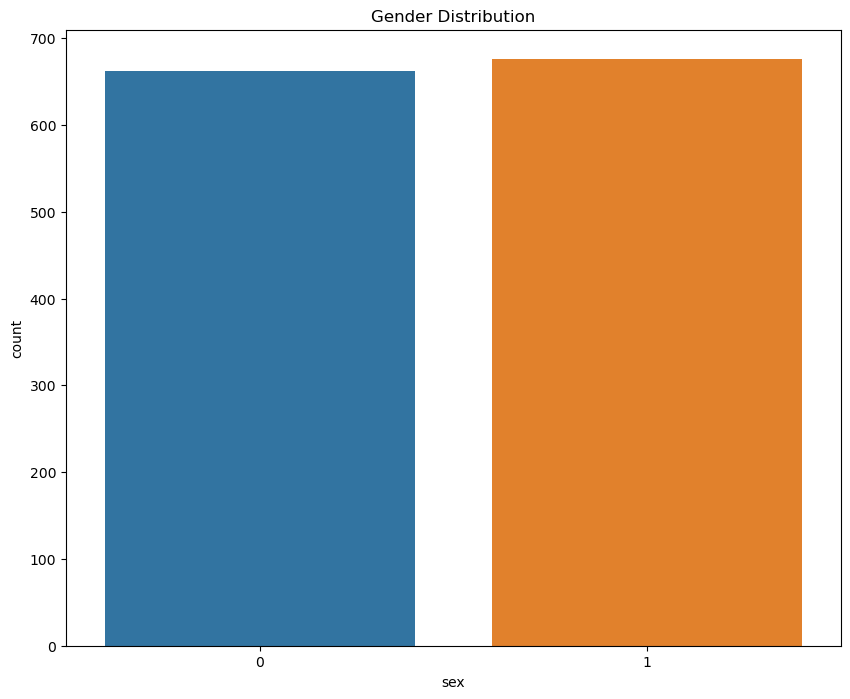

In [73]:
# checing sex distribution
plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')

***Male and Female almost have same number of insurance***

In [74]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Text(0, 0.5, 'Frequency of each bmi')

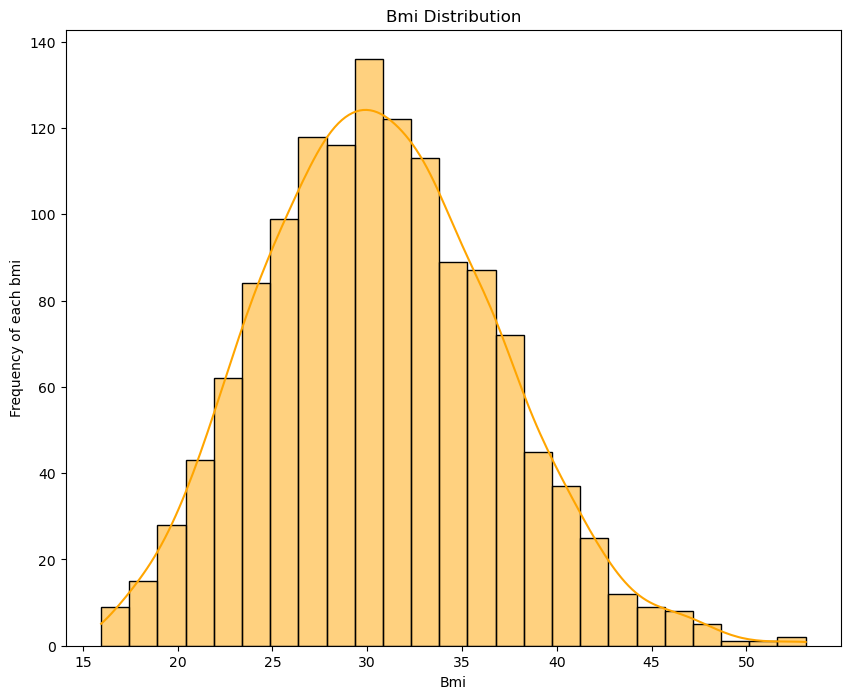

In [75]:
# Checking bmi distribution
plt.figure(figsize=(10,8))
sns.histplot(data.bmi, bins='auto',kde=True, color='orange')

plt.title('Bmi Distribution')
plt.xlabel('Bmi')
plt.ylabel('Frequency of each bmi')

range is noticed by checking the std

***The majority of the have BMI in between 25 to 40,, which is considered as overweight and could be a major factor in increasing the medical cost*** 

Text(0.5, 1.0, 'Region Distribution')

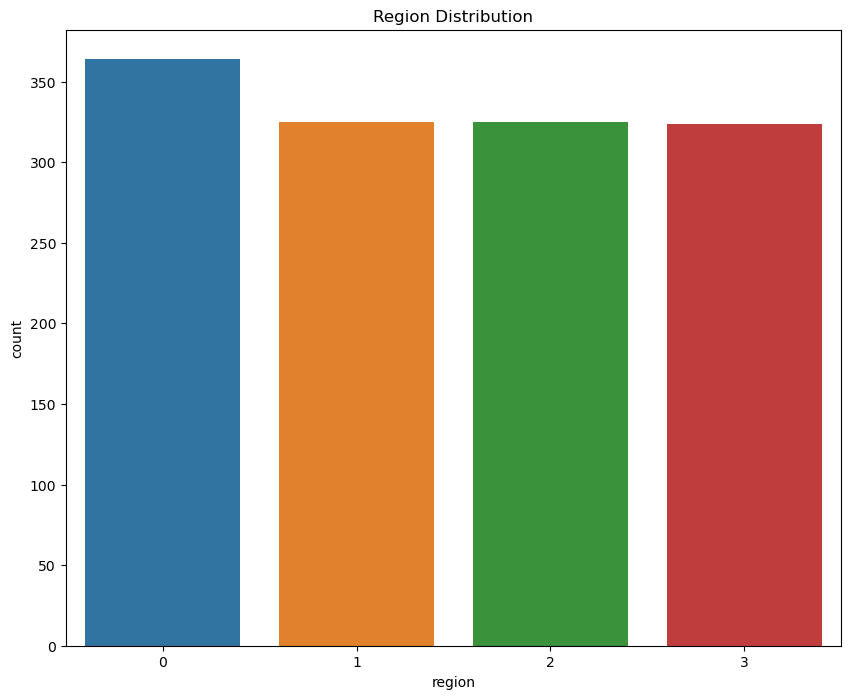

In [76]:
# check for region, smoker, children 

# checing Region distribution
plt.figure(figsize=(10,8))
sns.countplot(x='region', data=data)
plt.title('Region Distribution')

Text(0.5, 1.0, 'Children Distribution')

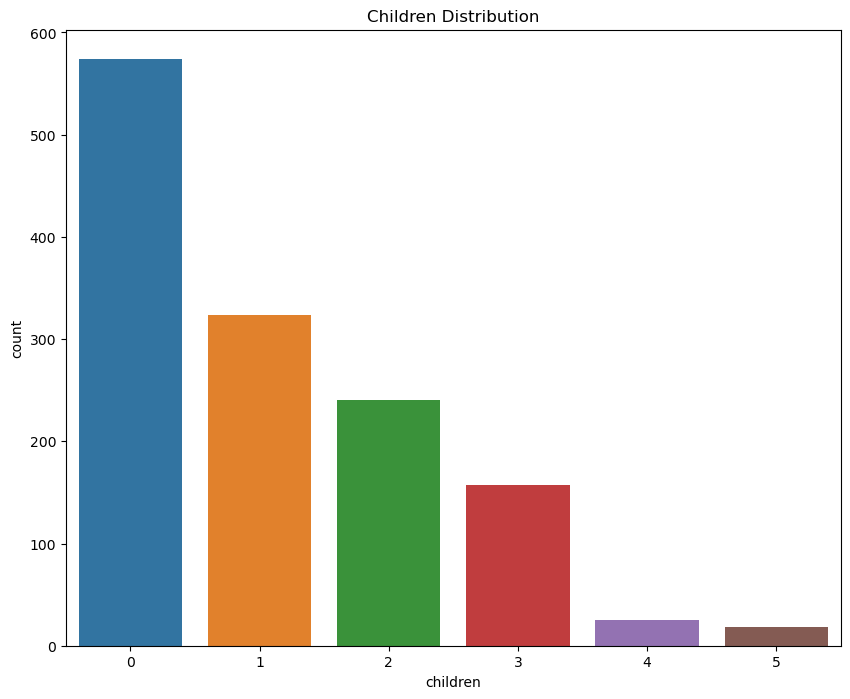

In [77]:
# checing children distribution
plt.figure(figsize=(10,8))
sns.countplot(x='children', data=data)
plt.title('Children Distribution')

Text(0.5, 1.0, 'Smoker Distribution')

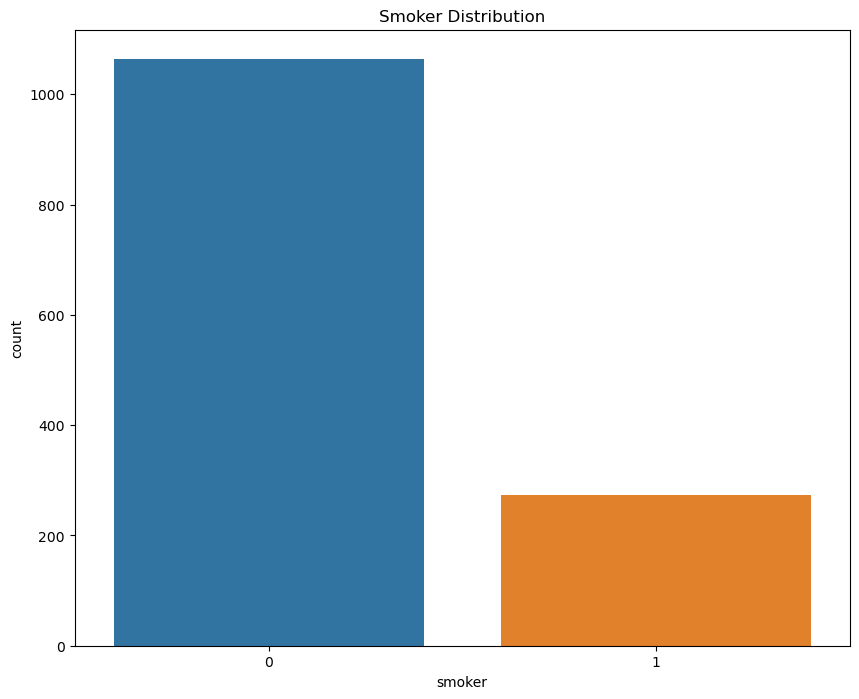

In [78]:
# checing Smoker distribution
plt.figure(figsize=(10,8))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')

Text(0, 0.5, 'Frequency of each Charges')

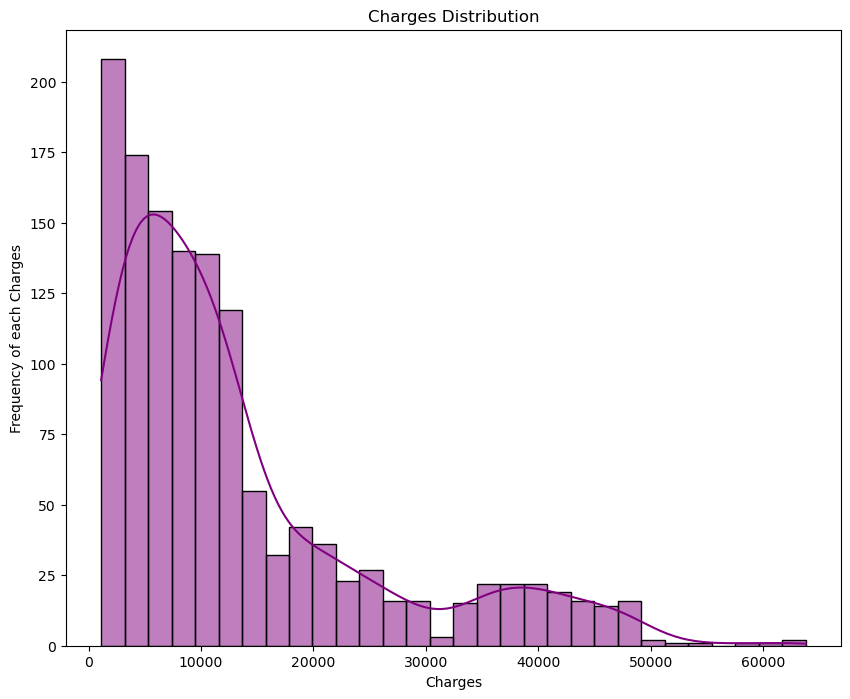

In [79]:
# Checking charges distribution
plt.figure(figsize=(10,8))
sns.histplot(data.charges, bins='auto',kde=True, color='purple')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency of each Charges')

***Most of the medical expenses are below 20000, with negligble number of the patients having a medical expense above 50000***

### Bi-Varirate Analysis
- Whenever we analsyis the two variable at a time is called Bi-ivariate

Text(0.5, 1.0, 'Relation between gender and Smoker')

<Figure size 1000x800 with 0 Axes>

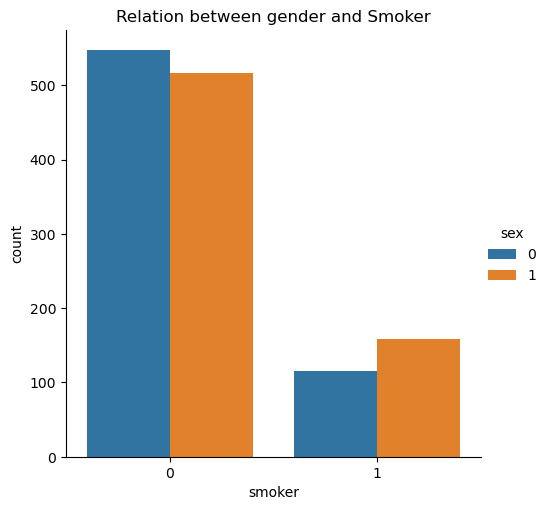

In [80]:
# relation between gender and Smoker

plt.figure(figsize=(10,8))
sns.catplot(x='smoker',kind='count', hue='sex', data=data)
plt.title('Relation between gender and Smoker')

***We can notice that male smkoker are more in numbers, so we can assume tht medical treatmentexpense for male would be more than female***

here 0 is for non-smoker and 1 is for smoker whereas orange stands male and blue for female 

Text(0.5, 1.0, 'Box plot for charges of women')

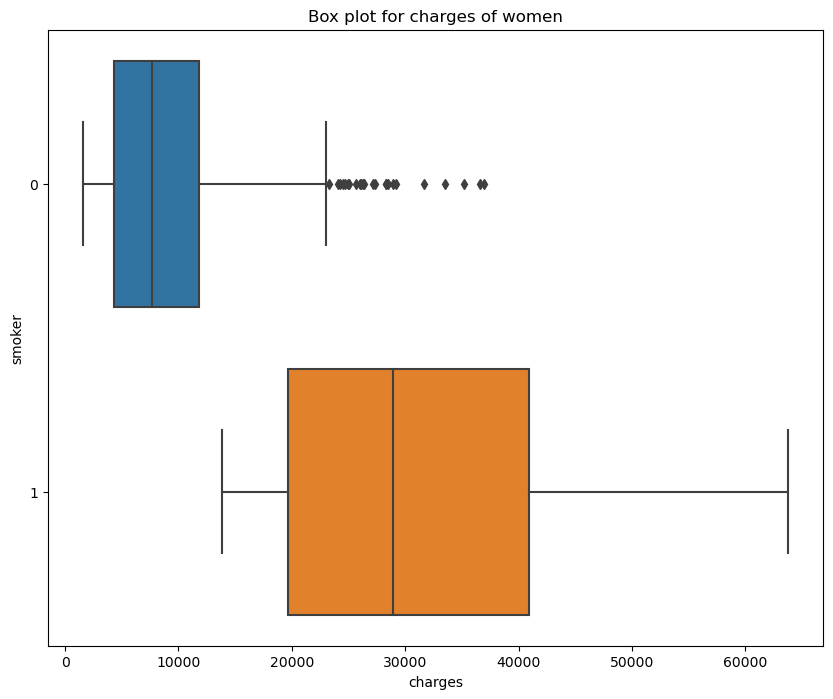

In [81]:
# relation between Smoker and charges for Women

plt.figure(figsize=(10,8))

sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h')
plt.title('Box plot for charges of women')

Text(0.5, 1.0, 'Box plot for charges of men')

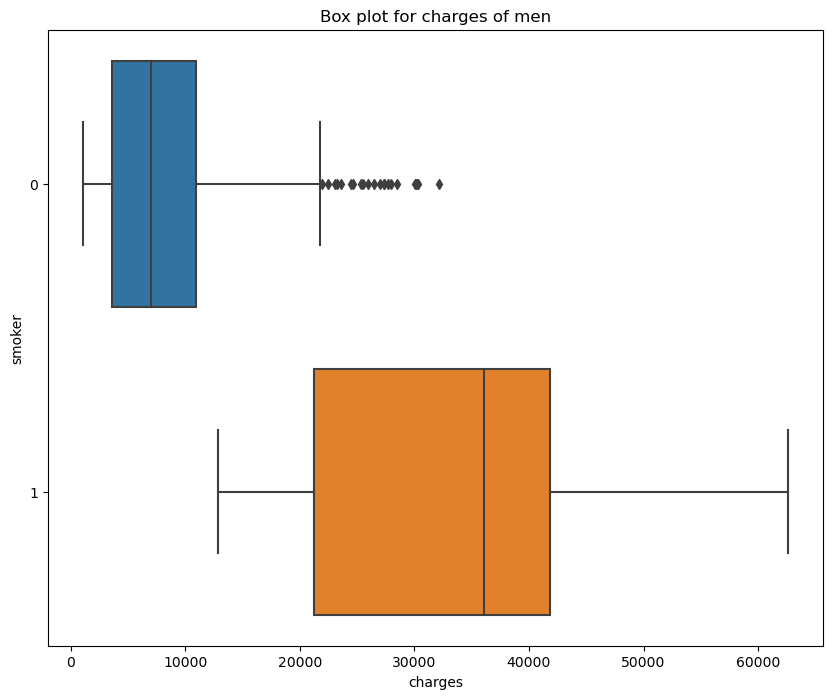

In [82]:
# relation between Smoker and charges for Men
plt.figure(figsize=(10,8))

sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h')
plt.title('Box plot for charges of men')

***The assumption is true that the medical expenses of males is greater than of females. Addition to that medical expenses of smoker is greater than of non-smoker.***  

In [83]:
# correlation 
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<AxesSubplot:>

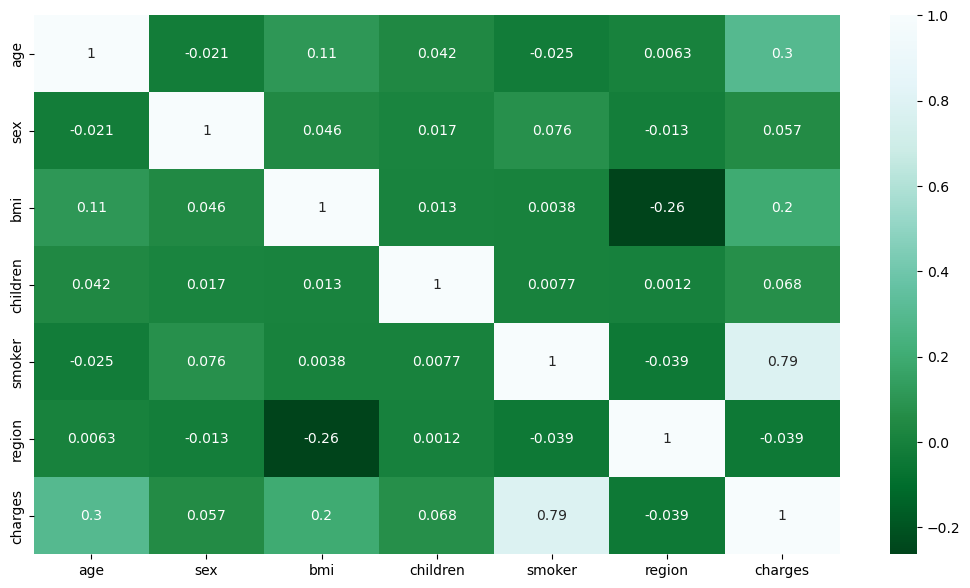

In [84]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

***Age has a strong positive correlation of approximately 0.3 with insurance charges.***

***BMI has a positive correlation of approximately 0.2 with insurance charge.***

***Smoker has a very high positive impact on Charges.***

***Whereas Region,Gender and Children has no impact.***

Text(0.5, 1.0, 'Relation between Smoker and Age')

<Figure size 1000x800 with 0 Axes>

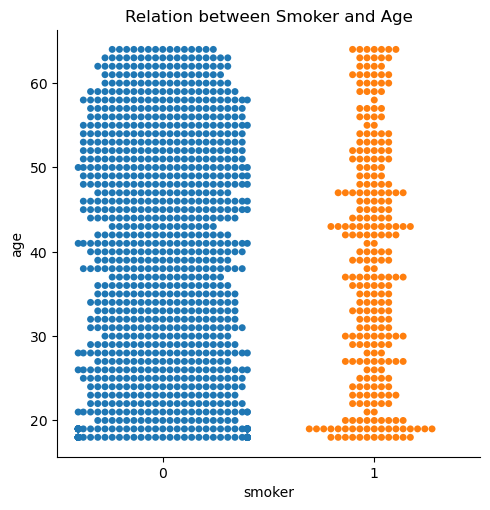

In [85]:
# relation b/w somker and age distribution
plt.figure(figsize=(10,8))

sns.catplot(x='smoker',y='age',kind='swarm',data=data)
plt.title('Relation between Smoker and Age')

***From above graph, we can observe that there is significant number of smoker at the age 19.***

### Multi-Varirate

Text(0.5, 1.0, 'Relation between Non-Smoker and Age')

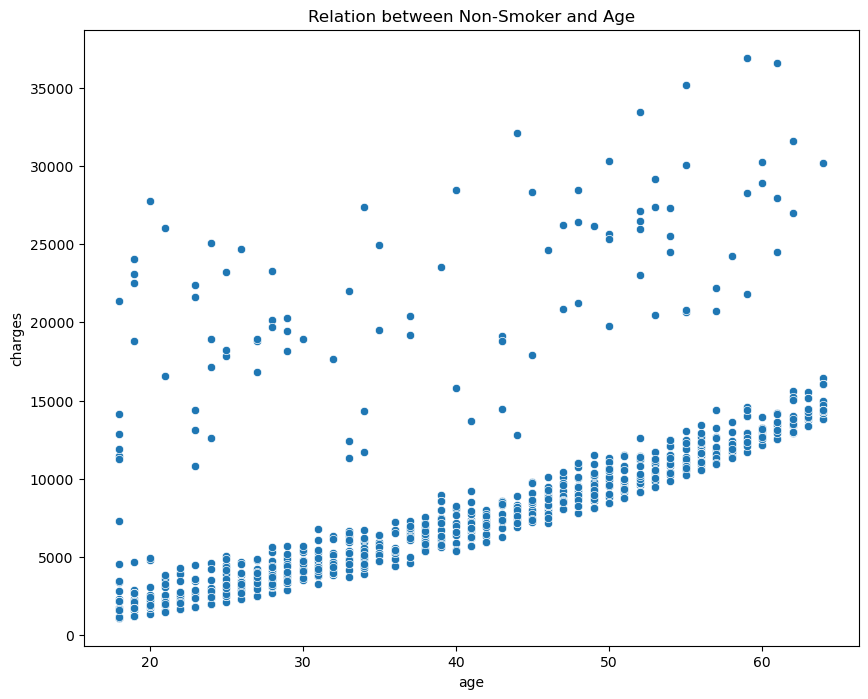

In [86]:
# Relation between Non-Smoker and Age
plt.figure(figsize=(10,8))

sns.scatterplot(x='age',y='charges',data=data[(data.smoker==0)])
plt.title('Relation between Non-Smoker and Age')

***Majority of the points shows that medical expenses increases with the age which may due to the fact that older are prone to illness. But there are some outliers which shows other illness or expenses which may lead to increases in medical expenses***

Text(0.5, 1.0, 'Relation between Smoker and Age')

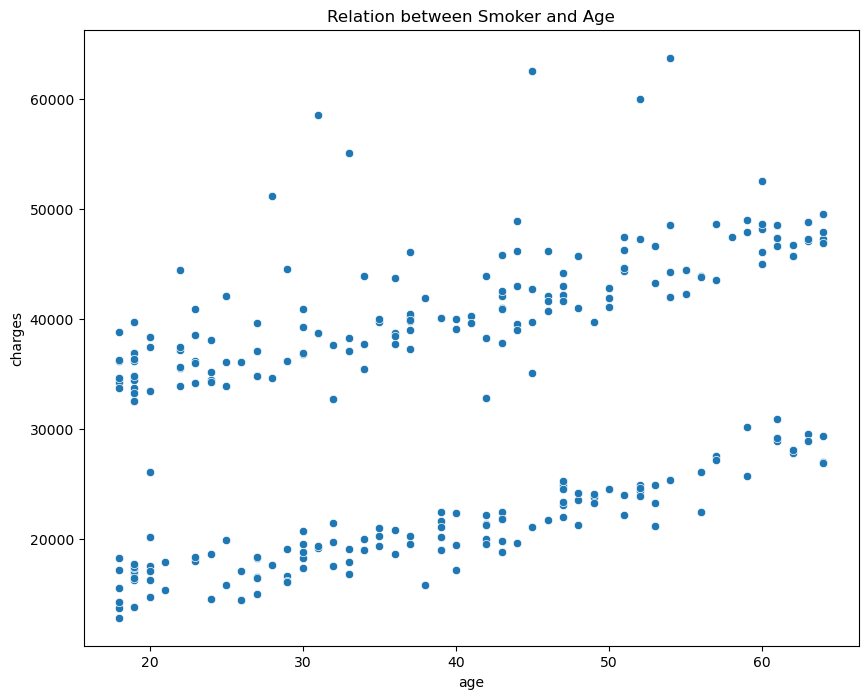

In [87]:
# Relation between Smoker and Age
plt.figure(figsize=(10,8))

sns.scatterplot(x='age',y='charges',data=data[(data.smoker==1)])
plt.title('Relation between Smoker and Age')

***In this graph there are Two Segments, one with high medical expense whih may occur due to the smoking related illness and other with low medical expense which may occur due to age realted illness***

***Now in order to get more clear vision we can combine both the graph***

Text(0.5, 28.999999999999986, 'Age')

<Figure size 1000x800 with 0 Axes>

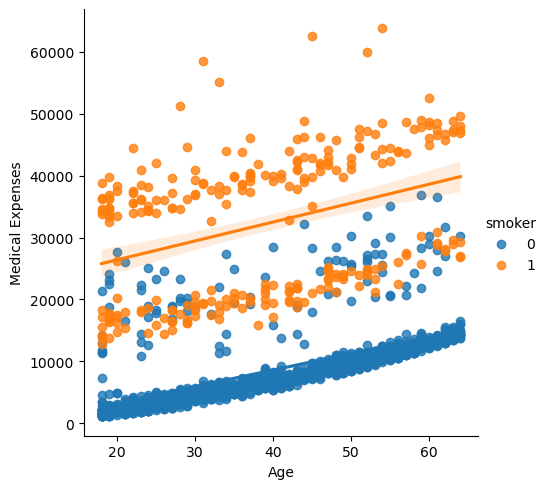

In [88]:
# Age Charges Distribution
plt.figure(figsize=(10,8))
sns.lmplot(x='age', y='charges', data=data, hue='smoker')
plt.ylabel('Medical Expenses')
plt.xlabel('Age')

***Now we can clearly understand the variation in charges with respect to age and smoking habits. The medical expenses of smoker is higher than that of non-smoker irrespective of age. In non-smoker, the cost of treatment increases with age. In non-smokers, the cost of the treatment with age which is obvious.***

Text(0.5, 0, 'Medical Expenses')

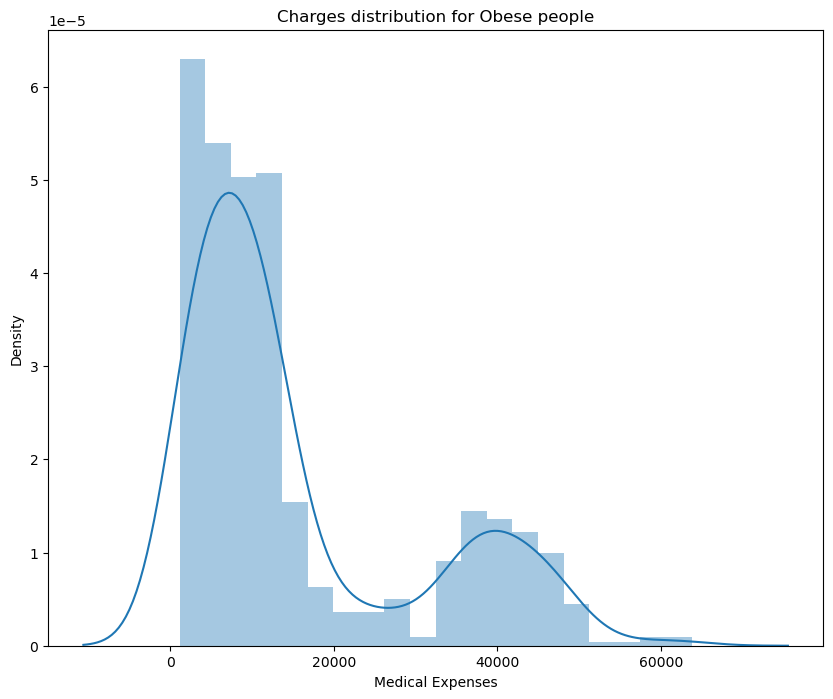

In [89]:
# Relation beetween bmi and charges
plt.figure(figsize=(10,8))

# BMI > 30
sns.distplot(data[(data.bmi>30)]['charges'])
plt.title('Charges distribution for Obese people')
plt.xlabel('Medical Expenses')

Text(0.5, 0, 'Medical Expenses')

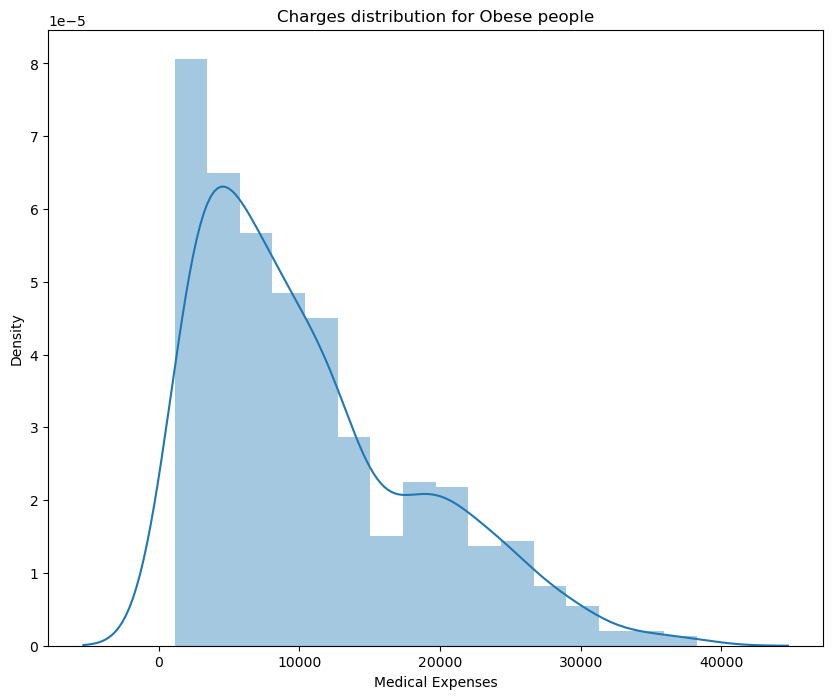

In [90]:
# BMI < 30 
plt.figure(figsize=(10,8))
sns.distplot(data[(data.bmi<30)]['charges'])
plt.title('Charges distribution for Obese people')
plt.xlabel('Medical Expenses')

***Therefore, people with BMI < 30 are spending less where as people with BMI > 30 are spending more***

## Model Building and Evaluation

### Linear Regression

In [91]:
x = data.drop(['charges','region'],axis=1)
y = data.charges

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [94]:
# linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [95]:
# Making Prediction 
y_pred = reg.predict(x_test)  # this gives us y_hat

In [96]:
x_pred = reg.predict(x_train)

In [97]:
# Model Evaluation for train data 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, x_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, x_pred)))
print('R2 Score:', metrics.r2_score(y_train, x_pred))

MAE: 4185.62124813945
RMSE: 6092.54026520953
R2 Score: 0.7441660615416086


In [ ]:
# final Model Evaluation for test data 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # used when there is an outliers in data
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

In [98]:
## if the r2 score differnce is more for test and train data than model is overfit, so to reduce it we use regularization

In [34]:
# optimizing r2 score 

### Feature Selection

In [35]:
# dropping irrevelant column
data.drop('region', axis=1, inplace=True)

In [36]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # used when there is an outliers in data
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

MAE: 4268.69663797491
RMSE: 5952.148688048978
R2 Score: 0.7652077247609825


## Polynomial Regresion
we a linear line doest not pass through the data point using LR than we make straight line little bit curve this is done by polynomial regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [39]:
# transforming the feature to higher degree
x_train_poly = poly_reg.fit_transform(x_train)

# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_train_poly,y_train, test_size=0.2, random_state=42)

In [40]:
# train the model
plr = LinearRegression()
plr.fit(x_train, y_train)

LinearRegression()

In [41]:
# making prediction
y_pred_plr = plr.predict(x_test)

In [42]:
# model evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr)) # used when there is an outliers in data
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_plr))

MAE: 3010.324131092967
RMSE: 4931.41889446287
R2 Score: 0.8257049677263546


***Result: My Model is able to explain 82 % of the total data set.***

## Making Prediction System

In [43]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [44]:
# input values
age = 24
sex = 1
bmi = 18.7
children = 0
smoker = 1

In [45]:
# predicting the price using random forest regression
charge = reg.predict([[age,sex,bmi,children,smoker]])
print('The charge of this new Patient is $', charge[0])

The charge of this new Patient is $ 23759.758386426358


## OLS Model

In [46]:
import statsmodels.api as sm

In [47]:
# add constant to predictor variables
x = sm.add_constant(x)

In [48]:
result = sm.OLS(y,x).fit()

# printing the summary table
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:25:03   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex         -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
smoker      2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [52]:
# Ridge Regression
Ridgemodel = Ridge()
Ridgemodel

Ridge()

In [53]:
# training the model
Ridgemodel.fit(x_train,y_train)

Ridge()

In [60]:
r_p = Ridgemodel.predict(x_train)
r2_score(y_train, r_p)

0.8426133127294129

In [61]:
r_p = Ridgemodel.predict(x_test)
r2_score(y_test, r_p)

0.825550505313569